# Clasificación y Optimización de Hiperparámetros (Core)

**Objetivo**  
Implementar un pipeline completo de machine learning para un problema de clasificación utilizando técnicas de preprocesamiento, modelado y optimización de hiperparámetros. El enfoque estará especialmente centrado en la limpieza de datos y la optimización mediante GridSearchCV y RandomizedSearchCV.

**Dataset**: Medical Cost Personal Dataset

**Descripción del Dataset:**  
El dataset de costos médicos personales contiene información sobre diversos factores que afectan los costos de seguros médicos, como la edad, el sexo, el índice de masa corporal, y el hábito de fumar. Este dataset es ideal para practicar técnicas de preprocesamiento y optimización de modelos debido a la presencia de datos sucios y variables tanto categóricas como numéricas.

**Instrucciones**:  

1. **Carga y Exploración Inicial de Datos:**
   - Cargar el dataset desde Kaggle.
   - Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.
   - Identificar y documentar los valores faltantes y outliers en el dataset.

2. **Preprocesamiento de Datos:**
   - Imputar valores faltantes utilizando técnicas adecuadas (media, mediana, moda, imputación avanzada).
   - Codificar variables categóricas utilizando One-Hot Encoding.
   - Escalar características numéricas utilizando StandardScaler.

3. **Implementación de Modelos de Clasificación:**
   - Entrenar y evaluar al menos tres modelos de clasificación diferentes: Regresión Logística, K-Nearest Neighbors (KNN), y Árbol de Decisión.
   - Utilizar validación cruzada para evaluar el rendimiento inicial de los modelos.

4. **Optimización de Hiperparámetros:**
   - Implementar GridSearchCV para optimizar los hiperparámetros de los modelos seleccionados.
   - Implementar RandomizedSearchCV como método alternativo de optimización.
   - Comparar los resultados de GridSearchCV y RandomizedSearchCV para los modelos optimizados.

5. **Evaluación de Modelos:**
   - Evaluar los modelos optimizados utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.
   - Generar y analizar la matriz de confusión para los modelos optimizados.
   - Crear y visualizar la curva ROC para evaluar la capacidad del modelo para distinguir entre clases.

6. **Documentación y Entrega:**
   - Documentar todos los pasos del proceso en un notebook de Jupyter, incluyendo explicaciones detalladas y justificaciones para cada decisión tomada.
   - Subir el notebook y los resultados a un repositorio de GitHub.
   - Crear un tag de liberación (v1.0.0) para esta versión del proyecto en GitHub.

**Entregables:**

- Notebook de Jupyter con todo el análisis y resultados.
- Documentación completa del proceso de preprocesamiento, modelado y optimización.
- Visualizaciones y análisis de las métricas de rendimiento.
- Repositorio de GitHub con el notebook y los resultados, incluyendo un tag de liberación.

**Nota:** Asegúrate de documentar cada paso del proceso, incluyendo la justificación de las decisiones tomadas durante el preprocesamiento, la selección de modelos y la evaluación de los resultados. Esto proporcionará una visión completa y estructurada del trabajo realizado.

## *****************************************************************
### Contexto del dataset:
El conjunto de datos contiene información sobre beneficiarios de seguros de salud y sus características, tales como edad, sexo, índice de masa corporal (IMC), número de hijos cubiertos, si fuman o no, la región de residencia, y los costos médicos facturados por el seguro.

### Columnas:
- **age**: Edad del asegurado.
- **sex**: Género del asegurado (masculino, femenino).
- **bmi**: Índice de masa corporal.
- **children**: Número de dependientes cubiertos por el seguro.
- **smoker**: Indica si el asegurado fuma o no.
- **region**: Área residencial del asegurado en EE. UU. (noreste, sureste, suroeste, noroeste).

### Variable de salida:
- **charges**: Costos médicos facturados por el seguro de salud.

## DESARROLLO

### 1. **Carga y Exploración Inicial de Datos:**
   - Cargar el dataset desde Kaggle.
   - Realizar una exploración inicial para entender la estructura del dataset y las características disponibles.
   - Identificar y documentar los valores faltantes y outliers en el dataset.


### 4. **Optimización de Hiperparámetros:**
   - Implementar GridSearchCV para optimizar los hiperparámetros de los modelos seleccionados.
   - Implementar RandomizedSearchCV como método alternativo de optimización.
   - Comparar los resultados de GridSearchCV y RandomizedSearchCV para los modelos optimizados.

### 5. **Evaluación de Modelos:**
   - Evaluar los modelos optimizados utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.
   - Generar y analizar la matriz de confusión para los modelos optimizados.
   - Crear y visualizar la curva ROC para evaluar la capacidad del modelo para distinguir entre clases.


### 6. **Documentación y Entrega:**
   - Documentar todos los pasos del proceso en un notebook de Jupyter, incluyendo explicaciones detalladas y justificaciones para cada decisión tomada.
   - Subir el notebook y los resultados a un repositorio de GitHub.
   - Crear un tag de liberación (v1.0.0) para esta versión del proyecto en GitHub.

In [464]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from utils import calculate_null, val_cat_unicos, val_num_unicos
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score


In [465]:
# Cargar el dataset
df = pd.read_csv(
    r'C:\\Users\\GIGABYTE\\Documents\\tareas_bootcamp_coding_dojo\\Proyecto_2\\data\\insurance.csv',
    encoding='latin1'
)
df.head().T  # Primeras 5 filas

,0,1,2,3,4
age,19,18,28,33,32
sex,female,male,male,male,male
bmi,27.9,33.77,33.0,22.705,28.88
children,0,1,3,0,0
smoker,yes,no,no,no,no
region,southwest,southeast,southeast,northwest,northwest
charges,16884.924,1725.5523,4449.462,21984.47061,3866.8552


In [466]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [467]:
# Renombrar columnas del dataset
df.columns = (
    df.columns
    .str.strip()               # Elimina espacios iniciales y finales
    .str.replace("'", "")      # Elimina comillas simples
    .str.replace("-", "_")     # Reemplaza guiones por guiones bajos
    .str.replace(" ", "_")     # Reemplaza espacios por guiones bajos
    .str.lower()               # Convierte todo a minúsculas
)

# Mostrar nombres de las columnas normalizados
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [468]:
data=df.copy() 

In [469]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
df = df.drop_duplicates()

Número de registros duplicados: 1


In [470]:
val_cat_unicos(df)

Valores únicos en la columna 'sex':
['female' 'male']

Valores únicos en la columna 'smoker':
['yes' 'no']

Valores únicos en la columna 'region':
['southwest' 'southeast' 'northwest' 'northeast']



In [471]:
val_num_unicos(df)

Valores únicos en la columna 'age':
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]

Valores únicos en la columna 'bmi':
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 3

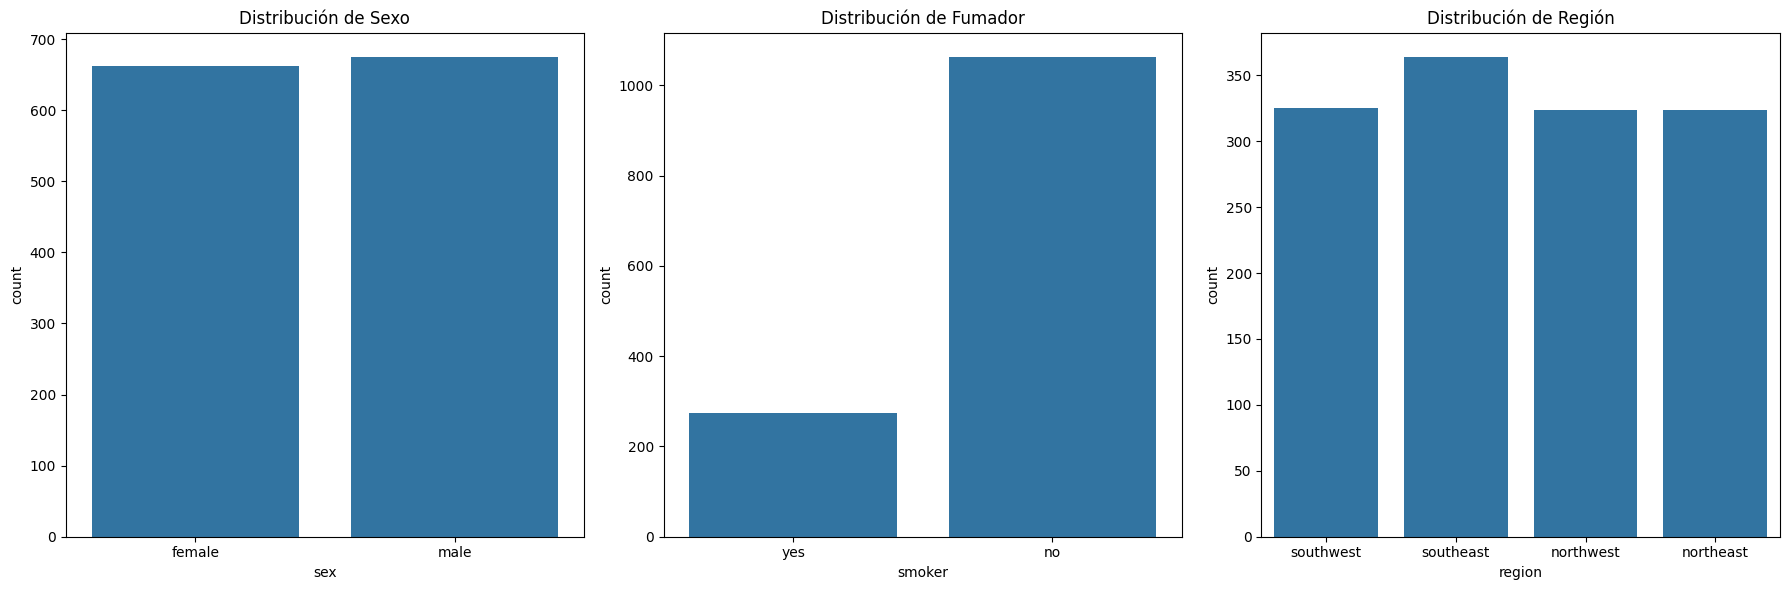

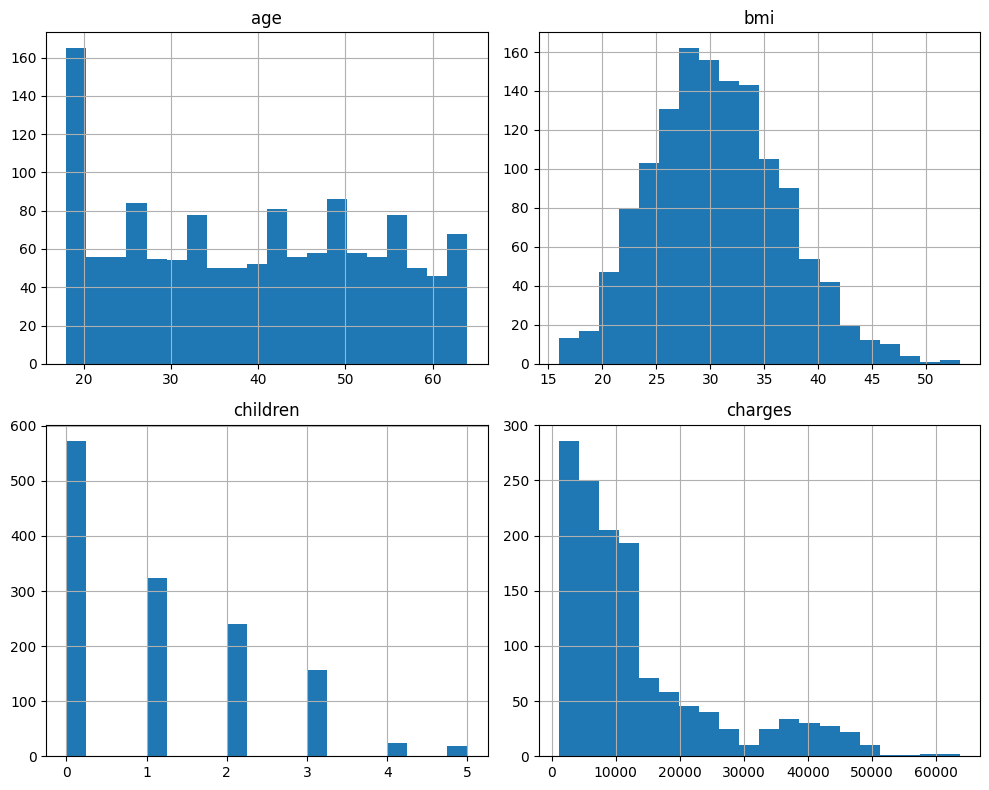

In [472]:
# Gráfico de barras para las columnas categóricas
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Sexo
sns.countplot(data=df, x='sex', ax=ax[0])
ax[0].set_title('Distribución de Sexo')

# Fumador
sns.countplot(data=df, x='smoker', ax=ax[1])
ax[1].set_title('Distribución de Fumador')

# Región
sns.countplot(data=df, x='region', ax=ax[2])
ax[2].set_title('Distribución de Región')

plt.tight_layout()
plt.show()

# Histograma para las columnas numéricas
df[['age', 'bmi', 'children', 'charges']].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

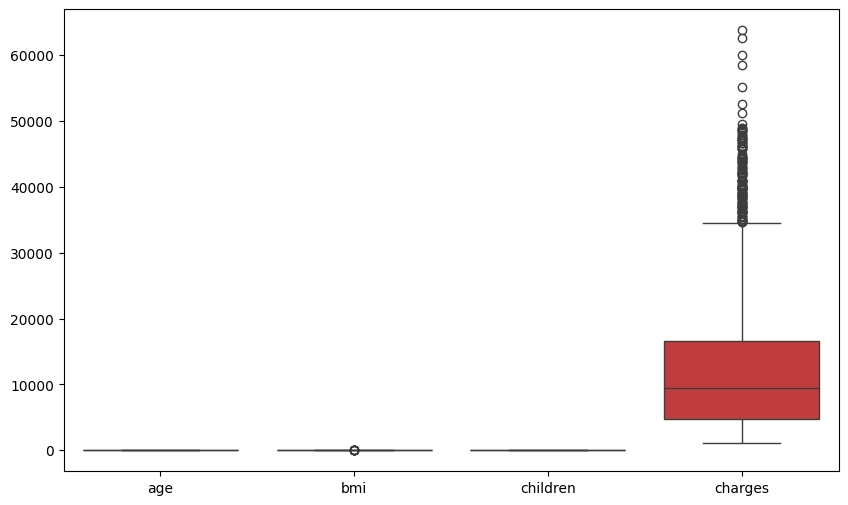

In [473]:
# Boxplot para cada columna numérica
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['age', 'bmi', 'children', 'charges']])
plt.show()


In [474]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [ ]:
calculate_null(df)

,datos sin NAs en q,Na en q,Na en %
age,1337,0,0.0
sex,1337,0,0.0
bmi,1337,0,0.0
children,1337,0,0.0
smoker,1337,0,0.0
region,1337,0,0.0
charges,1337,0,0.0


In [ ]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer


# Exploración inicial de los datos
print(df.head())
print(df.info())
print(df.describe())

# Verificación de valores faltantes
print(df.isnull().sum())

# Verificación de outliers visualmente (boxplot)
sns.boxplot(data=df)
plt.show()

# Manejo de valores faltantes
# Usaremos SimpleImputer para imputar valores faltantes
imputer = SimpleImputer(strategy="mean")  # Para columnas numéricas
df['bmi'] = imputer.fit_transform(df[['bmi']])

# Codificación de variables categóricas (sex, smoker, region)
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Escalado de las características numéricas
scaler = StandardScaler()
df[['age', 'bmi', 'children']] = scaler.fit_transform(df[['age', 'bmi', 'children']])

# Definición de las características (X) y la variable objetivo (y)
X = df.drop('charges', axis=1)
y = df['charges']

# División del dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento y evaluación de modelos sin optimización
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

for name, model in models.items():
    print(f"\nEvaluación del modelo {name}")
    # Validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Promedio de validación cruzada: {cv_scores.mean()}")

# Optimización de hiperparámetros con GridSearchCV y RandomizedSearchCV

# GridSearchCV para KNN
param_grid_knn = {'n_neighbors': np.arange(1, 20)}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
print(f"Mejores parámetros para KNN con GridSearch: {grid_search_knn.best_params_}")

# RandomizedSearchCV para KNN
param_dist_knn = {'n_neighbors': np.arange(1, 20)}
random_search_knn = RandomizedSearchCV(KNeighborsClassifier(), param_dist_knn, cv=5, n_iter=10)
random_search_knn.fit(X_train, y_train)
print(f"Mejores parámetros para KNN con RandomizedSearch: {random_search_knn.best_params_}")

# Evaluación de modelos optimizados
best_knn = grid_search_knn.best_estimator_

best_knn.fit(X_train, y_train)
y_pred_knn = best_knn.predict(X_test)

print("\nMétricas del modelo optimizado KNN:")
print(classification_report(y_test, y_pred_knn))

# Generación de la matriz de confusión
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Bajo", "Alto"], yticklabels=["Bajo", "Alto"])
plt.title('Matriz de Confusión - KNN')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, best_knn.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - KNN')
plt.legend(loc="lower right")
plt.show()

# Lo mismo puede hacerse para los otros modelos, repitiendo el proceso de GridSearchCV y RandomizedSearchCV para Regresión Logística y Árbol de Decisión.



Evaluación del modelo Logistic Regression


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1231, in fit
    check_classification_targets(y)
  File "c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\multiclass.py", line 219, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


In [463]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Convertir 'sex' y 'smoker' a variables binarias
#df['sex'] = df['sex'].map({'female': 0, 'male': 1})
#df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# Convertir 'region' en variables dummy
df = pd.get_dummies(df, columns=['region', 'sex', 'smoker'], drop_first=True)

# Seleccionar las características (X) y la variable objetivo (y)
X = df.drop(columns=['charges'])
y = df['charges']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Usar SMOTE para balancear el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Definir los modelos
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42, C=0.1),  # Ajuste de regularización con C
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),  # Experimentar con n_neighbors
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42, max_depth=5)  # Limitar la profundidad
}

# Entrenar y evaluar cada modelo con validación cruzada
for model_name, model in models.items():
    print(f"Evaluando modelo: {model_name}")
    
    # Realizar validación cruzada para obtener una evaluación más robusta
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    print(f"Precisión media en validación cruzada: {scores.mean():.4f}")
    
    # Entrenar el modelo en el conjunto de entrenamiento balanceado
    model.fit(X_train_resampled, y_train_resampled)
    
    # Hacer predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Evaluar el rendimiento en el conjunto de prueba
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_pred, zero_division=1))  # Evitar warnings de precision ill-defined
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "="*50 + "\n")


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Convertir 'sex' y 'smoker' a variables binarias
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# Convertir 'region' en variables dummy
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Seleccionar las características (X) y la variable objetivo (y)
# Seleccionar todas las columnas excepto 'charges' para las características (X)
X = df.drop(columns=['charges'])

# Seleccionar la variable objetivo (y)
y = df['smoker']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Definir los modelos con class_weight='balanced' donde sea aplicable
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),  # KNN no tiene 'class_weight'
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42)
}

### 3. **Implementación de Modelos de Clasificación:**
   - Entrenar y evaluar al menos tres modelos de clasificación diferentes: Regresión Logística, K-Nearest Neighbors (KNN), y Árbol de Decisión.
   - Utilizar validación cruzada para evaluar el rendimiento inicial de los modelos.

In [ ]:
from sklearn.model_selection import cross_val_score

# Entrenar y evaluar los modelos con validación cruzada
for model_name, model in models.items():
    print(f"Evaluando modelo: {model_name}")
    
    # Usar SMOTE en el conjunto de entrenamiento
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    
    # Validación cruzada (por ejemplo, 5-fold cross-validation)
    scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
    
    print(f"Precisión media en validación cruzada: {scores.mean():.4f}")
    
    # Entrenar el modelo en el conjunto completo y evaluar en el conjunto de prueba
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_pred, zero_division=1))
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "="*50 + "\n")


Evaluando modelo: Logistic Regression
Precisión media en validación cruzada: 1.0000
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00        55

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268

Matriz de confusión:
[[213   0]
 [  0  55]]


Evaluando modelo: K-Nearest Neighbors
Precisión media en validación cruzada: 1.0000
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00        55

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268

Matriz de confusión:
[[213   0]
 [  0  55]]


Evaluando modelo: Decision Tree
Pr

In [ ]:

# Entrenar y evaluar cada modelo con validación cruzada
for model_name, model in models.items():
    print(f"Evaluando modelo: {model_name}")
    
    # Entrenar el modelo con el conjunto de entrenamiento balanceado
    model.fit(X_resampled, y_resampled)
    
    # Hacer predicciones
    y_pred = model.predict(X_test)
    
    # Evaluar el rendimiento en el conjunto de prueba
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_pred, zero_division=1))  # Evitar warnings de precision ill-defined
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "="*50 + "\n")


Evaluando modelo: Logistic Regression
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00        55

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268

Matriz de confusión:
[[213   0]
 [  0  55]]


Evaluando modelo: K-Nearest Neighbors
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00        55

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268

Matriz de confusión:
[[213   0]
 [  0  55]]


Evaluando modelo: Decision Tree
Reporte de clasificación:
              precision    recall  f1-score   support

           0 

Error cuadrático medio (MSE): 2.476056023128772e-31
Error absoluto medio (MAE): 4.028701087492406e-16
R² (coeficiente de determinación): 1.0


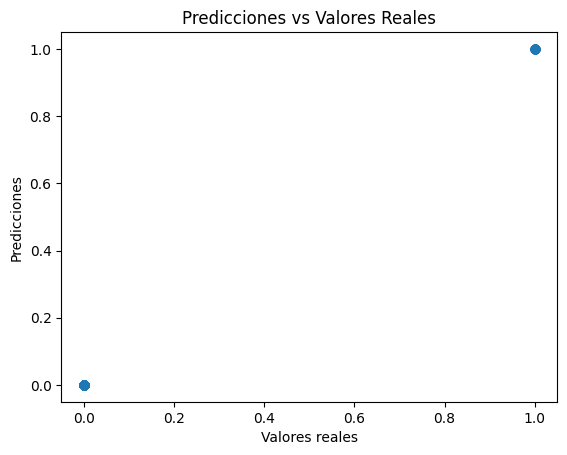

In [ ]:
# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Error absoluto medio (MAE): {mae}")
print(f"R² (coeficiente de determinación): {r2}")

# Graficar las predicciones vs los valores reales
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.show()

In [ ]:
# Convertir 'sex' y 'smoker' a variables binarias
from sklearn.preprocessing import OneHotEncoder


df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# Convertir 'region' en variables dummy
df = pd.get_dummies(df, columns=['region'], drop_first=True)

# Separar las características (X) y la variable objetivo (y)
X = df[['age', 'bmi', 'children', 'sex', 'smoker', 'region_southeast', 'region_northwest']]
y = df['charges']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Error absoluto medio (MAE): {mae}")
print(f"R² (coeficiente de determinación): {r2}")

# Graficar las predicciones vs los valores reales
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.show()


KeyError: "None of [Index(['region'], dtype='object')] are in the [columns]"

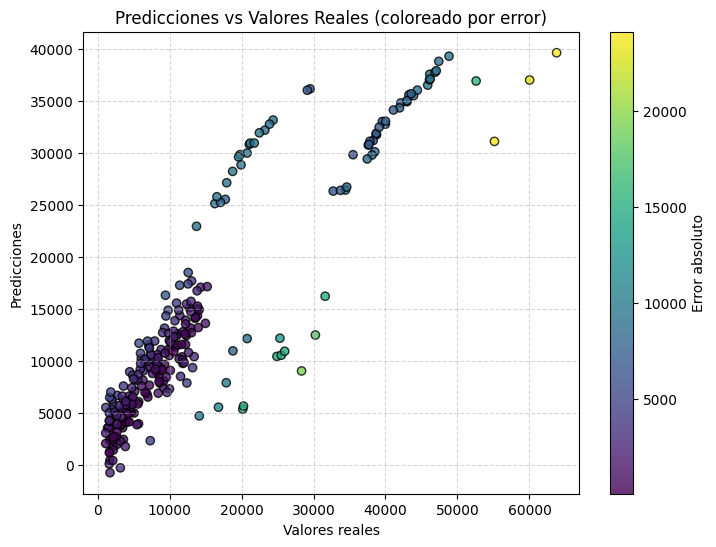

In [ ]:
# Calcular el error absoluto para cada predicción
errors = np.abs(y_test - y_pred)

# Graficar las predicciones vs los valores reales con colores basados en el error absoluto
plt.figure(figsize=(8, 6))
scatter = plt.scatter(y_test, y_pred, c=errors, cmap='viridis', alpha=0.8, edgecolor='k')
plt.colorbar(scatter, label='Error absoluto')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales (coloreado por error)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
